<a href="https://colab.research.google.com/github/belindadmr/Forecasting-Prophet/blob/main/Copy_of_Prophet_Clear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Baca file Excel
df = pd.read_csv('visitor_data.csv')


In [ ]:
# Mengubah nama kolom menjadi 'ds' (tanggal) dan 'y' (jumlah pengunjung)
df.columns = ['ds', 'y']

In [ ]:
df.head()

,ds,y
0,2018-01-31,3732
1,2018-02-27,3607
2,2018-03-31,2653
3,2018-04-30,4264
4,2018-05-31,1835


In [ ]:
visitor_df = pd.DataFrame(df)
visitor_df['ds'] = pd.to_datetime(visitor_df['ds'], errors='coerce')

# Cetak DataFrame yang sudah diubah
print(visitor_df)

           ds     y
0  2018-01-31  3732
1  2018-02-27  3607
2  2018-03-31  2653
3  2018-04-30  4264
4  2018-05-31  1835
5  2018-06-30  1763
6  2018-07-31  2731
7  2018-08-31  4431
8  2018-09-30  2033
9  2018-10-31  4795
10 2018-11-30  1277
11 2018-12-31  2778
12 2019-01-31  2828
13 2019-02-27  3647
14 2019-03-31  4142
15 2019-04-30  4544
16 2019-05-31  3648
17 2019-06-30  4468
18 2019-07-31  3362
19 2019-08-31  1705
20 2019-09-30  4558
21 2019-10-31  3599
22 2019-11-30  3135
23 2019-12-31  3222
24 2020-01-31  4672
25 2020-02-27  3897
26 2020-03-31  2701
27 2020-04-30  1537
28 2020-05-31  3893
29 2020-06-30  3120
30 2020-07-31  3825
31 2020-08-31  2940
32 2020-09-30  3163
33 2020-10-31  1976
34 2020-11-30  1755
35 2020-12-31  4781
36 2021-01-31  3046
37 2021-02-27  2871
38 2021-03-31  4503
39 2021-04-30  3496
40 2021-05-31  3898
41 2021-06-30  1099
42 2021-07-31  3008
43 2021-08-31  4249
44 2021-09-30  1755
45 2021-10-31  1797
46 2021-11-30  1659
47 2021-12-31  4219
48 2022-01-31  3958


In [ ]:
visitor_df = pd.DataFrame(df)
visitor_df['ds'] = pd.to_datetime(visitor_df['ds'])

In [ ]:
# Membuat model Prophet
model = Prophet()
model.fit(visitor_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppuic_h1r/u8veusar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppuic_h1r/gaz534ks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96337', 'data', 'file=/tmp/tmppuic_h1r/u8veusar.json', 'init=/tmp/tmppuic_h1r/gaz534ks.json', 'output', 'file=/tmp/tmppuic_h1r/prophet_modelpblfy9_u/prophet_model-20240826071033.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:10:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Inisialisasi model Prophet dengan pengaturan hyperparameter
model = Prophet(
    changepoint_prior_scale=0.5,  # Mengatur sensitivitas model terhadap perubahan tren
    seasonality_prior_scale=10.0  # Mengatur kekuatan musiman
)

# Fit model dengan data
model.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppuic_h1r/n76didqq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppuic_h1r/dlzdjxhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45100', 'data', 'file=/tmp/tmppuic_h1r/n76didqq.json', 'init=/tmp/tmppuic_h1r/dlzdjxhv.json', 'output', 'file=/tmp/tmppuic_h1r/prophet_model2m6bxe_d/prophet_model-20240826071038.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:10:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from sklearn.metrics import mean_absolute_error

# Asumsikan df_test adalah data aktual untuk periode prediksi
y_true = df['y']  # Data aktual
y_pred = df['yhat'].iloc[:len(y_true)]  # Hasil prediksi sesuai dengan panjang data aktual

mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


KeyError: 'yhat'

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'Root Mean Square Error (RMSE): {rmse}')


Root Mean Square Error (RMSE): 772.7828768426374


In [ ]:
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Percentage Error (MAPE): 26.413313044614412%


In [ ]:
# Menginisialisasi model Prophet
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3p311gpw/dfq6il3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3p311gpw/zzgr1s52.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45930', 'data', 'file=/tmp/tmp3p311gpw/dfq6il3q.json', 'init=/tmp/tmp3p311gpw/zzgr1s52.json', 'output', 'file=/tmp/tmp3p311gpw/prophet_modelz3193_vv/prophet_model-20240823071037.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:10:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='365 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())


NameError: name 'm' is not defined

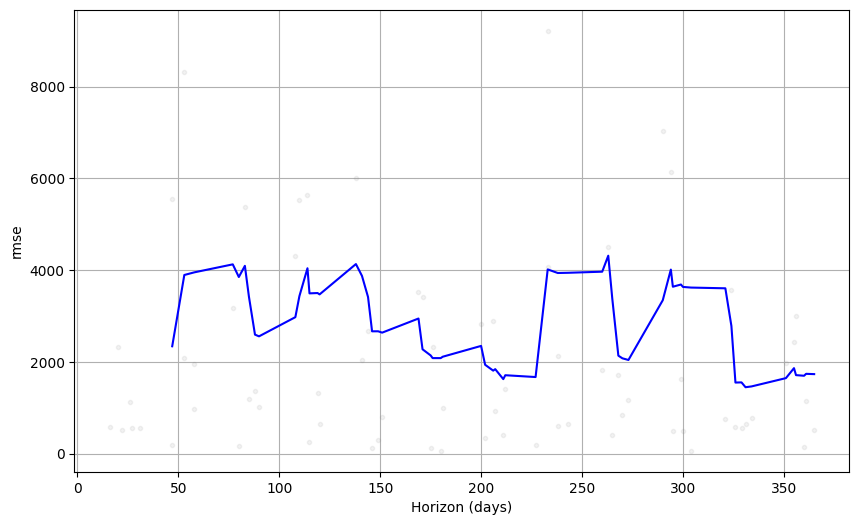

In [ ]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')


In [ ]:
# Membuat dataframe untuk periode peramalan
future = m.make_future_dataframe(periods=12, freq='M')  # Meramalkan 12 bulan ke depan
forecast = m.predict(future)

# Tampilkan hasil peramalan
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)


,ds,yhat,yhat_lower,yhat_upper
60,2023-01-31,3386.741459,2422.527674,4404.732150
61,2023-02-28,2598.673523,1608.144553,3644.133838
62,2023-03-31,3395.806341,2357.334178,4338.234137
63,2023-04-30,4362.388051,3326.652595,5450.880272
64,2023-05-31,2470.893517,1490.881445,3509.219777
65,2023-06-30,2453.761507,1469.370405,3479.261337
66,2023-07-31,2105.894331,1011.675051,3084.042033
67,2023-08-31,2595.069155,1673.998407,3627.388087
68,2023-09-30,2777.191228,1758.504542,3816.518557
69,2023-10-31,3783.243593,2766.023493,4839.483729


In [ ]:
from prophet.plot import plot_plotly

# Visualisasi hasil peramalan
fig = plot_plotly(m, forecast)
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Data aktual
df_test = df[-12:]  # Asumsi 12 bulan terakhir sebagai data uji
y_true = df_test['y'].values
y_pred = forecast['yhat'].iloc[-12:].values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'Root Mean Square Error (RMSE): {rmse}')

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Mean Absolute Error (MAE): 824.2179009071109
Root Mean Square Error (RMSE): 905.3469727487858
Mean Absolute Percentage Error (MAPE): 35.95770376790695%


In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='365 days', period='180 days', horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())


INFO:prophet:Making 6 forecasts with cutoffs between 2019-07-15 00:00:00 and 2021-12-31 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3p311gpw/118bnslp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3p311gpw/y7404_s6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79083', 'data', 'file=/tmp/tmp3p311gpw/118bnslp.json', 'init=/tmp/tmp3p311gpw/y7404_s6.json', 'output', 'file=/tmp/tmp3p311gpw/prophet_modellq2j1z99/prophet_model-20240823071233.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:12:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:12:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3p311gpw/3zpaxzq6.json
DEBUG:cmdstanpy:input tempfi

  horizon           mse         rmse          mae      mape     mdape  \
0 47 days  5.477611e+06  2340.429714  1546.213221  0.661723  0.184754   
1 53 days  1.516628e+07  3894.391363  2625.589047  1.078897  0.366735   
2 58 days  1.562213e+07  3952.483967  2803.704472  1.228645  0.725121   
3 77 days  1.702424e+07  4126.043786  3177.898162  1.308062  0.725121   
4 80 days  1.482590e+07  3850.441266  2791.248248  1.080788  0.698373   

      smape  coverage  
0  0.387202  0.571429  
1  0.518118  0.428571  
2  0.602632  0.285714  
3  0.734018  0.142857  
4  0.650923  0.214286  


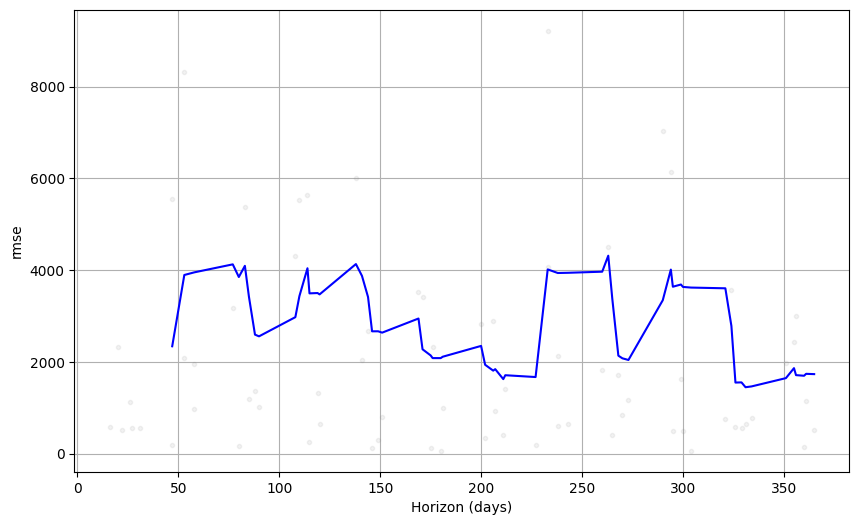

In [ ]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')
fig.show()


In [ ]:
# Membuat DataFrame untuk 12 bulan ke depan
future = model.make_future_dataframe(periods=12, freq='M')  # periods=12 berarti 12 bulan

# Membuat prediksi
forecast = model.predict(future)

# Melihat hasil prediksi untuk 12 bulan ke depan
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))


           ds         yhat   yhat_lower   yhat_upper
60 2023-01-31  3238.542978  2219.083782  4147.985284
61 2023-02-28  2619.425940  1720.092408  3577.685299
62 2023-03-31  3308.527600  2317.794505  4317.544960
63 2023-04-30  4213.914748  3232.439190  5191.555601
64 2023-05-31  2270.303958  1273.578962  3262.193652
65 2023-06-30  2209.581192  1244.649085  3177.372357
66 2023-07-31  1856.197892   827.415596  2861.145091
67 2023-08-31  2345.832403  1294.718927  3321.356503
68 2023-09-30  2532.324435  1538.521728  3555.062609
69 2023-10-31  3543.734389  2568.657033  4521.413435
70 2023-11-30  1486.992657   462.368714  2405.352700
71 2023-12-31  2098.771435  1171.353754  3108.837436


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


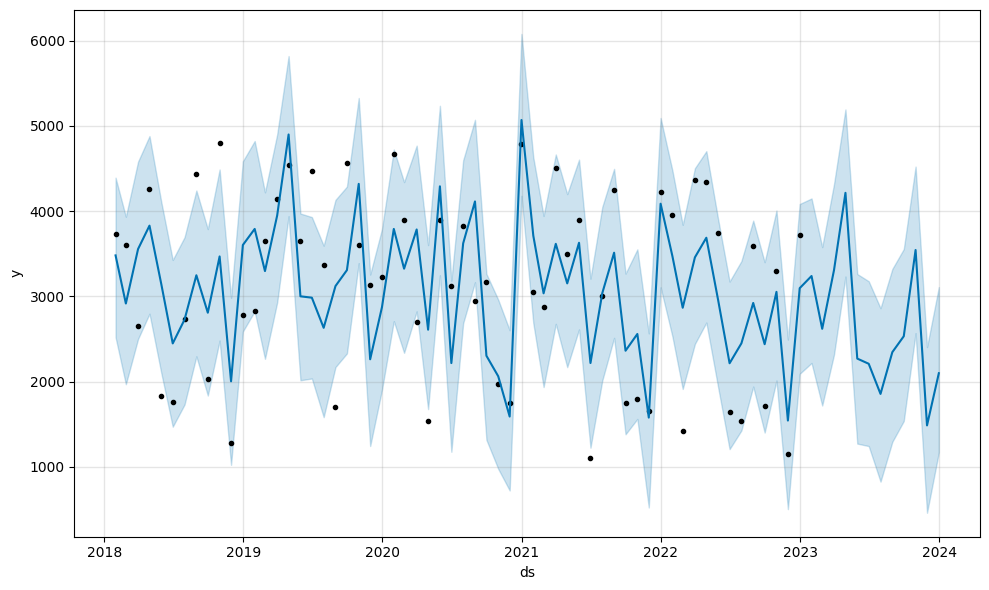

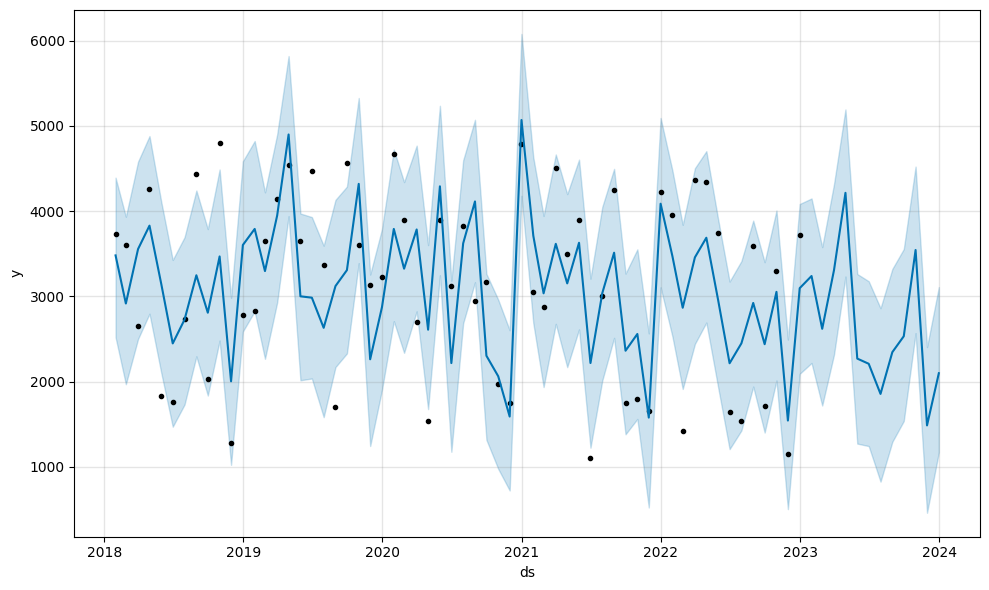

In [ ]:
# Visualisasi hasil prediksi
model.plot(forecast)

In [ ]:
# Membuat dataframe untuk forecasting
future = model.make_future_dataframe(periods=12, freq='M')

In [ ]:
# Melakukan prediksi
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwnqppo2_/jws7erre.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwnqppo2_/kx7d2l1o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17711', 'data', 'file=/tmp/tmpwnqppo2_/jws7erre.json', 'init=/tmp/tmpwnqppo2_/kx7d2l1o.json', 'output', 'file=/tmp/tmpwnqppo2_/prophet_modelvexx8w05/prophet_model-20240822155309.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:53:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:53:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


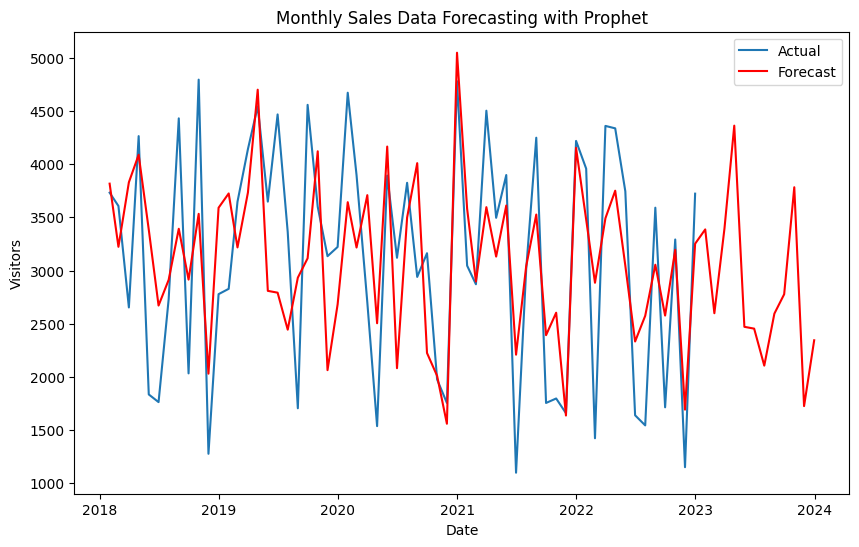

In [ ]:
# Membuat model Prophet
model = Prophet()
model.fit(visitor_df)
# Membuat dataframe untuk forecasting
future = model.make_future_dataframe(periods=12, freq='M')
# Melakukan prediksi
forecast = model.predict(future)
# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(visitor_df['ds'], visitor_df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.title('Monthly Sales Data Forecasting with Prophet')
plt.legend()
plt.show()

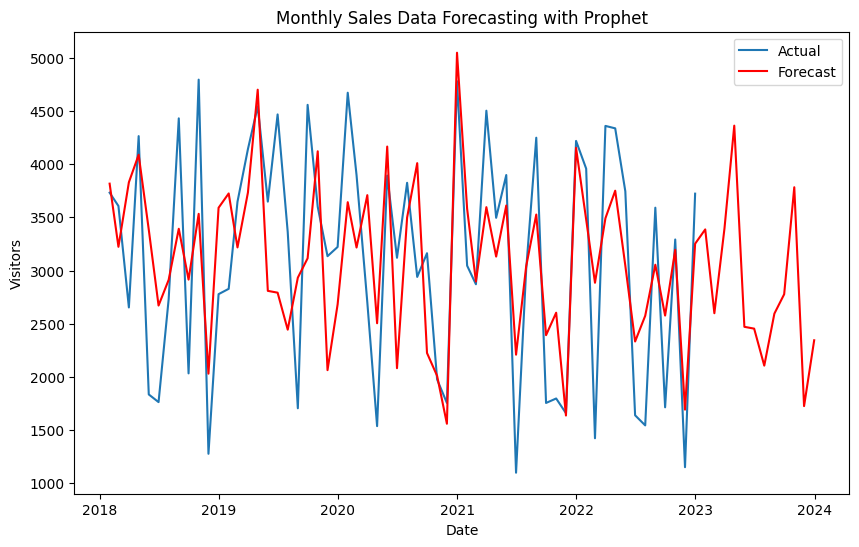

In [ ]:
# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(visitor_df['ds'], visitor_df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Visitors')
plt.title('Monthly Sales Data Forecasting with Prophet')
plt.legend()
plt.show()

MSE: 0.375
RMSE: 0.6123724356957945
MAE: 0.5


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

In [ ]:
df = pd.read_csv('visitor_data.csv',
                   index_col=[0], parse_dates=[0]) # We set the index column and know it has dates

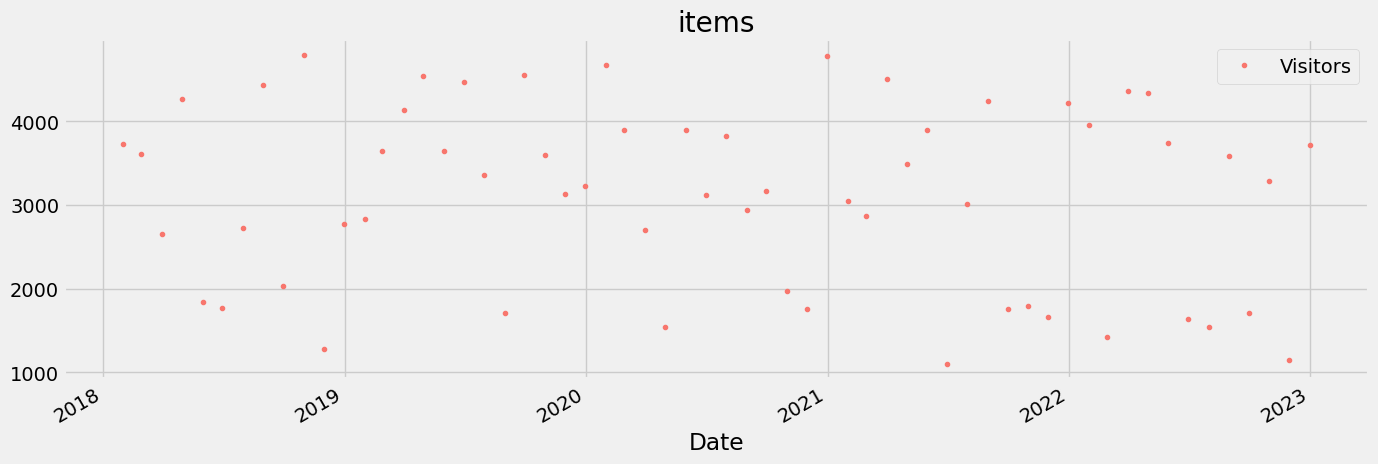

In [ ]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='items')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('visitor_data.csv', index_col='Date')

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Baca data
data = pd.read_csv('visitor_data.csv', parse_dates=['Date'])
data = data.set_index('Date')

# Lihat preview data
print(data.head())

            Visitors
Date                
2018-01-31      3732
2018-02-27      3607
2018-03-31      2653
2018-04-30      4264
2018-05-31      1835
